# **1. Perkenalan Dataset**



1. **Sumber Dataset**:  
   Dataset di peroleh dari [Kaggle](https://www.kaggle.com/) dengan nama [Movie Industry](https://www.kaggle.com/datasets/danielgrijalvas/movies)

2. **Tentang Dataset**:
This dataset contains information about three decades of movie data (1986-2016), scraped from IMDb using Python.

3. **Features Dataset**:  
   There are 6820 movies in the dataset (220 movies per year, 1986-2016). Each movie has the following attributes:

   - budget: the budget of a movie. Some movies don't have this, so it appears as 0
   - company: the production company
   - country: country of origin
   - director: the director
   - genre: main genre of the movie.
   - gross: revenue of the movie
   - name: name of the movie
   - rating: rating of the movie (R, PG, etc.)
   - released: release date (YYYY-MM-DD)
   - runtime: duration of the movie
   - score: IMDb user rating
   - votes: number of user votes
   - star: main actor/actress
   - writer: writer of the movie
   - year: year of release

# **2. Import Library**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, FeatureAgglomeration
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, RobustScaler, MaxAbsScaler
from scipy.stats import chi2_contingency
from yellowbrick.cluster import KElbowVisualizer
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, SelectKBest, chi2, f_classif, SelectPercentile
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

In [2]:
df = pd.read_csv("movies_inisiasi.csv")

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
df.tail()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0
7667,Tee em el,NaN,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,NaN,NaN,PK 65 Films,102.0


# **4. Exploratory Data Analysis (EDA)**

In [5]:
print("Jumlah Baris dan Kolom pada Dataset:")
df.shape

Jumlah Baris dan Kolom pada Dataset:


(7668, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [7]:
df.describe(include='all')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
count,7668,7591,7668,7668.000000,7666,7665.000000,7.665000e+03,7668,7665,7667,7665,5.497000e+03,7.479000e+03,7651,7664.000000
unique,7512,12,19,NaN,3414,NaN,NaN,2949,4535,2814,59,NaN,NaN,2385,NaN
top,Nobody's Fool,R,Comedy,NaN,"February 14, 1986 (United States)",NaN,NaN,Woody Allen,Woody Allen,Nicolas Cage,United States,NaN,NaN,Universal Pictures,NaN
freq,3,3697,2245,NaN,9,NaN,NaN,38,37,43,5475,NaN,NaN,377,NaN
mean,NaN,NaN,NaN,2000.405451,NaN,6.390411,8.810850e+04,NaN,NaN,NaN,NaN,3.558988e+07,7.850054e+07,NaN,107.261613
std,NaN,NaN,NaN,11.153508,NaN,0.968842,1.633238e+05,NaN,NaN,NaN,NaN,4.145730e+07,1.657251e+08,NaN,18.581247
min,NaN,NaN,NaN,1980.000000,NaN,1.900000,7.000000e+00,NaN,NaN,NaN,NaN,3.000000e+03,3.090000e+02,NaN,55.000000
25%,NaN,NaN,NaN,1991.000000,NaN,5.800000,9.100000e+03,NaN,NaN,NaN,NaN,1.000000e+07,4.532056e+06,NaN,95.000000
50%,NaN,NaN,NaN,2000.000000,NaN,6.500000,3.300000e+04,NaN,NaN,NaN,NaN,2.050000e+07,2.020576e+07,NaN,104.000000
75%,NaN,NaN,NaN,2010.000000,NaN,7.100000,9.300000e+04,NaN,NaN,NaN,NaN,4.500000e+07,7.601669e+07,NaN,116.000000


In [8]:
categorical_features = []
numerical_features = []

for col in df.columns:
    if df[col].dtype == 'object':
        categorical_features.append(col)
    else:
        numerical_features.append(col)

print('Kolom kategorikal:', categorical_features)
print('Jumlah kolom kategorikal:', len(categorical_features))
print('Kolom numerikal:', numerical_features)
print('Jumlah kolom numerikal:', len(numerical_features))


Kolom kategorikal: ['name', 'rating', 'genre', 'released', 'director', 'writer', 'star', 'country', 'company']
Jumlah kolom kategorikal: 9
Kolom numerikal: ['year', 'score', 'votes', 'budget', 'gross', 'runtime']
Jumlah kolom numerikal: 6


In [9]:
print("Analisa Deksriptif:")
print(df.describe(include='all').T)

Analisa Deksriptif:
           count unique                                top  freq  \
name        7668   7512                      Nobody's Fool     3   
rating      7591     12                                  R  3697   
genre       7668     19                             Comedy  2245   
year      7668.0    NaN                                NaN   NaN   
released    7666   3414  February 14, 1986 (United States)     9   
score     7665.0    NaN                                NaN   NaN   
votes     7665.0    NaN                                NaN   NaN   
director    7668   2949                        Woody Allen    38   
writer      7665   4535                        Woody Allen    37   
star        7667   2814                       Nicolas Cage    43   
country     7665     59                      United States  5475   
budget    5497.0    NaN                                NaN   NaN   
gross     7479.0    NaN                                NaN   NaN   
company     7651   2385     

In [10]:
categorical_agg = df.groupby('genre').agg({
    'score': ['mean', 'median', 'count'],
    'votes': 'sum',
    'budget': ['mean', 'max'],
    'year': ['min', 'max']
}).reset_index()
categorical_agg.head()

genre     score                     votes        budget               \
                  mean median count          sum          mean          max   
0     Action  6.202817    6.2  1704  239541188.0  5.808460e+07  356000000.0   
1  Adventure  6.291569    6.4   427   43358242.0  4.570839e+07  250000000.0   
2  Animation  6.769231    6.8   338   43153458.0  7.578520e+07  260000000.0   
3  Biography  7.030926    7.1   443   40057318.0  2.531232e+07  159000000.0   
4     Comedy  6.193987    6.3  2245  121865748.0  2.260780e+07  175000000.0   

   year        
    min   max  
0  1980  2020  
1  1980  2020  
2  1980  2020  
3  1980  2019  
4  1980  2020

In [11]:
numerical_agg = (df.groupby(pd.cut(df['year'], 
                                 bins=[1980, 1990, 2000, 2010, 2020],
                                 labels=['80s', '90s', '00s', '10s']))
                 .agg({
                     'score': 'mean',
                     'budget': ['mean', 'std'],
                     'gross': ['sum', 'mean'],
                     'runtime': 'median'
                 }))
numerical_agg.head()

/var/folders/7c/r339yn2d5535rzdsd58d38t40000gn/T/ipykernel_15350/3954545345.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  numerical_agg = (df.groupby(pd.cut(df['year'],


score        budget                       gross               runtime
          mean          mean           std           sum          mean  median
year                                                                          
80s   6.227756  1.309061e+07  1.067572e+07  4.109507e+10  2.519624e+07   100.0
90s   6.386650  2.956945e+07  2.687798e+07  1.012257e+11  5.159313e+07   103.5
00s   6.425050  4.259454e+07  4.211641e+07  1.940565e+11  9.722271e+07   104.0
10s   6.517179  5.055607e+07  5.663945e+07  2.482446e+11  1.372275e+08   107.0

In [12]:
country_agg = df.groupby('country').agg({
    'score': ['mean', 'count'],
    'gross': 'sum',
    'runtime': 'median',
    'year': ['min', 'max']
}).reset_index()
country_agg.head()

country     score               gross runtime  year      
                  mean count           sum  median   min   max
0  Argentina  7.687500     8  1.362436e+08   113.0  1985  2019
1      Aruba  4.900000     1  1.031992e+07    91.0  1998  1998
2  Australia  6.682609    92  3.008909e+09   100.0  1980  2019
3    Austria  7.020000     5  1.046004e+08   105.0  1993  2019
4    Belgium  7.137500     8  4.048799e+07   108.5  1992  2014

In [13]:
director_agg = df.groupby('director').agg({
    'name': 'count',
    'score': 'mean',
    'gross': 'sum'
}).rename(columns={'name': 'movie_count'}).reset_index()
director_agg.head()

,director,movie_count,score,gross
0,A.R. Murugadoss,1,7.300000,38316584.0
1,Aamir Khan,1,8.400000,21897373.0
2,Aaron Blaise,1,6.800000,250397798.0
3,Aaron Norris,6,4.983333,41169421.0
4,Aaron Seltzer,1,2.800000,85749034.0


In [14]:
budget_agg = (df.groupby(pd.qcut(df['budget'], 
                               q=4, 
                               labels=['Low', 'Medium', 'High', 'Very High']))
              .agg({
                  'score': 'mean',
                  'gross': ['mean', 'sum'],
                  'runtime': 'median'
              }))
budget_agg.head()

/var/folders/7c/r339yn2d5535rzdsd58d38t40000gn/T/ipykernel_15350/1573246660.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  budget_agg = (df.groupby(pd.qcut(df['budget'],


score         gross               runtime
               mean          mean           sum  median
budget                                                 
Low        6.410695  2.053986e+07  2.965955e+10    98.0
Medium     6.330616  4.435593e+07  5.535620e+10   104.0
High       6.350865  7.773626e+07  1.120957e+11   108.0
Very High  6.449616  2.786642e+08  3.628208e+11   114.0

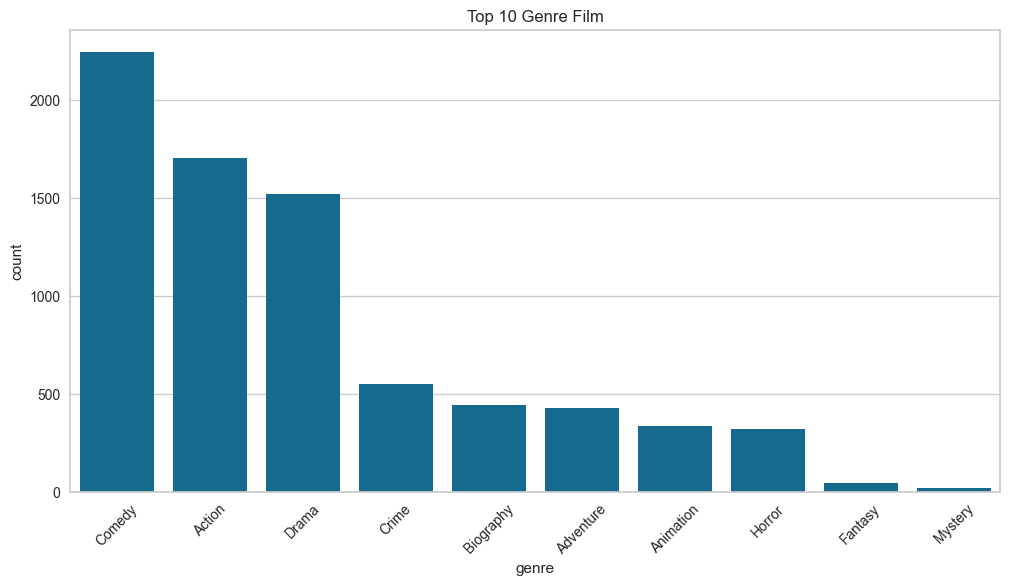

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='genre', order=df['genre'].value_counts().index[:10])
plt.title('Top 10 Genre Film')
plt.xticks(rotation=45)
plt.show()

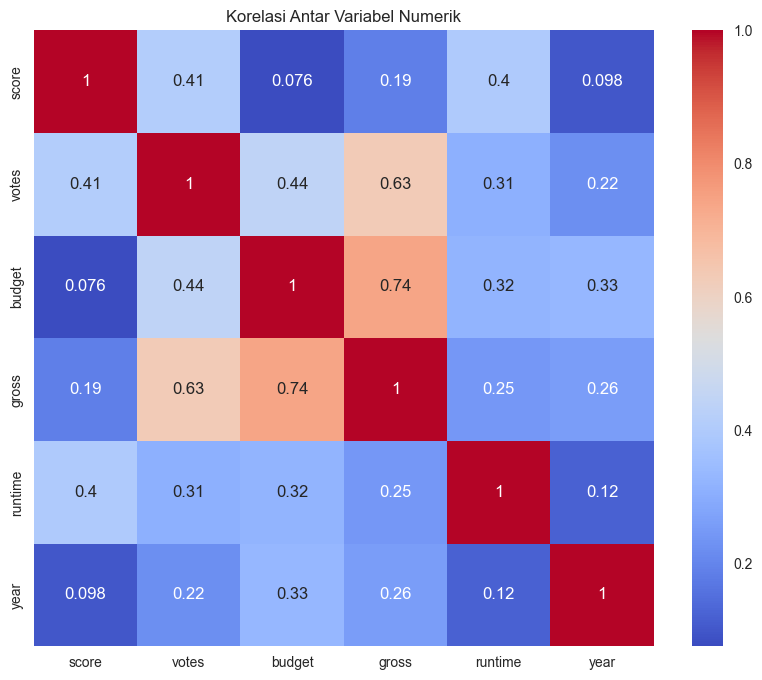

In [16]:
corr_matrix = df[['score', 'votes', 'budget', 'gross', 'runtime', 'year']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Variabel Numerik')
plt.show()

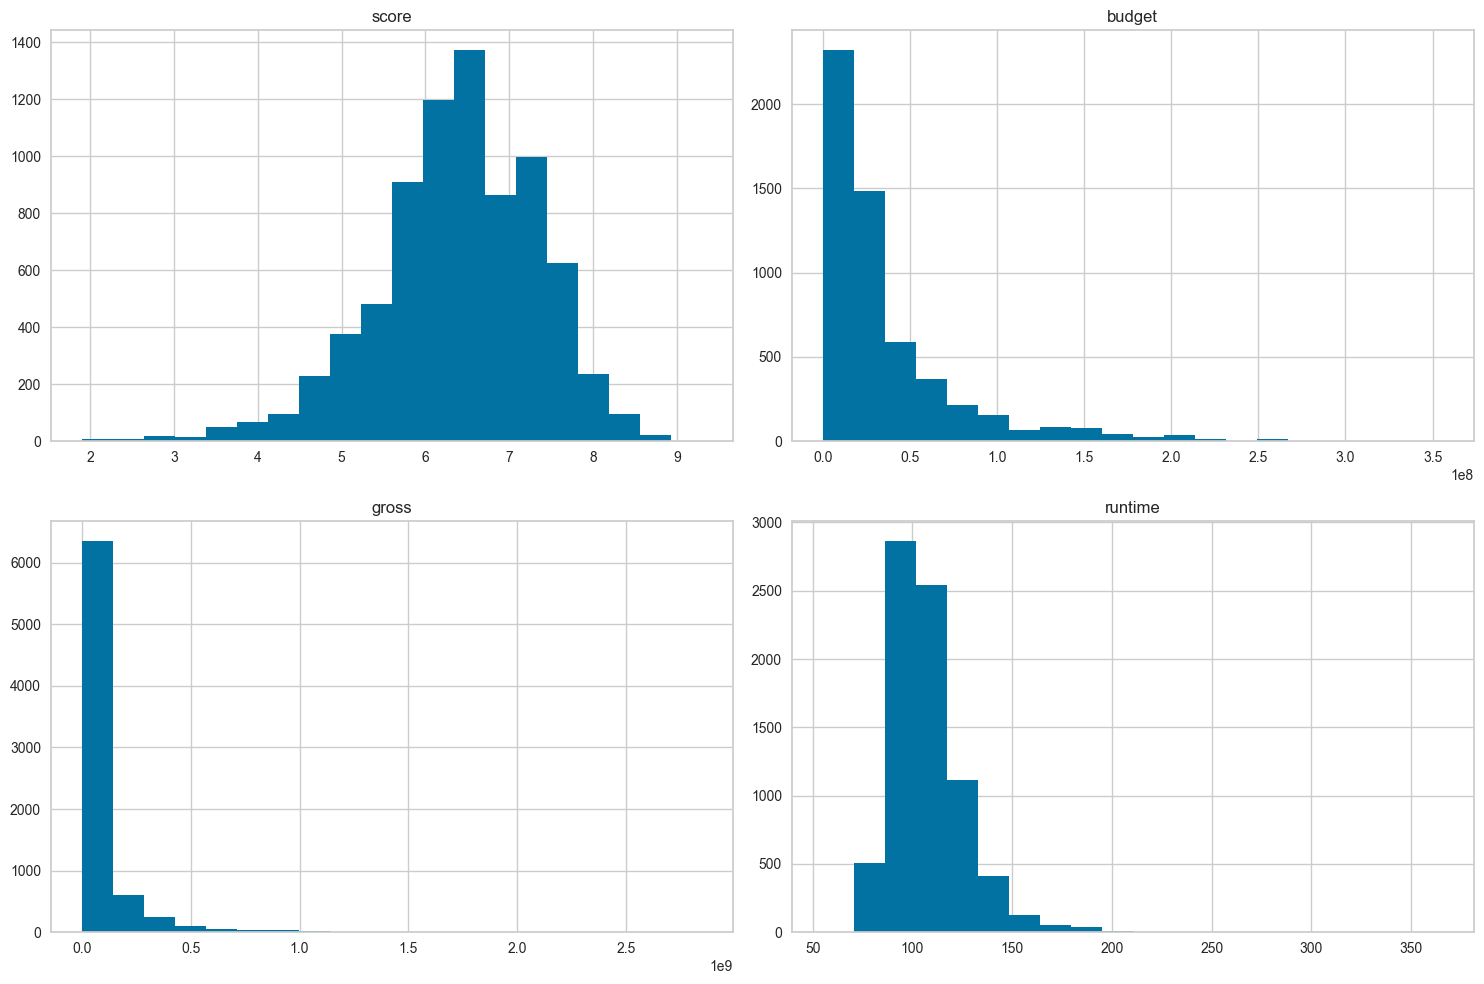

In [17]:
num_cols = ['score', 'budget', 'gross', 'runtime']
df[num_cols].hist(bins=20, figsize=(15,10))
plt.tight_layout()
plt.show()

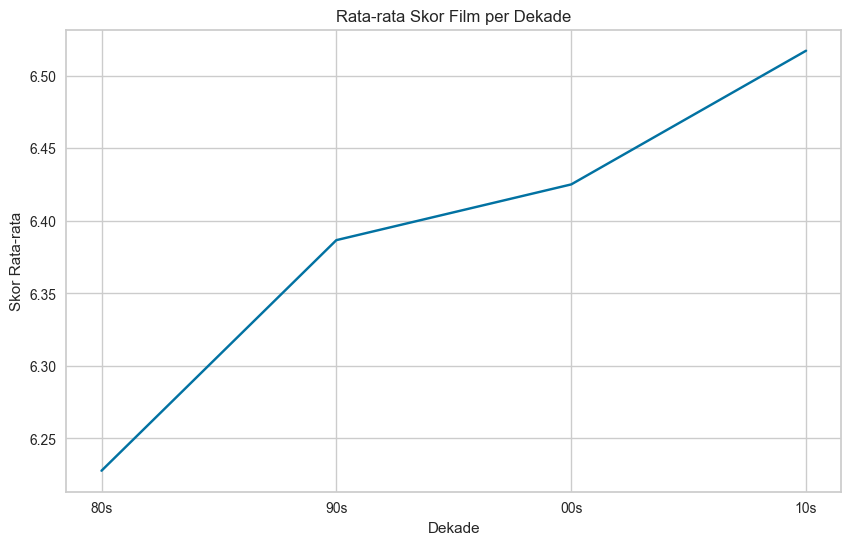

In [18]:
plt.figure(figsize=(10,6))
sns.lineplot(data=numerical_agg, x='year', y=('score', 'mean'))
plt.title('Rata-rata Skor Film per Dekade')
plt.xlabel('Dekade')
plt.ylabel('Skor Rata-rata')
plt.show()

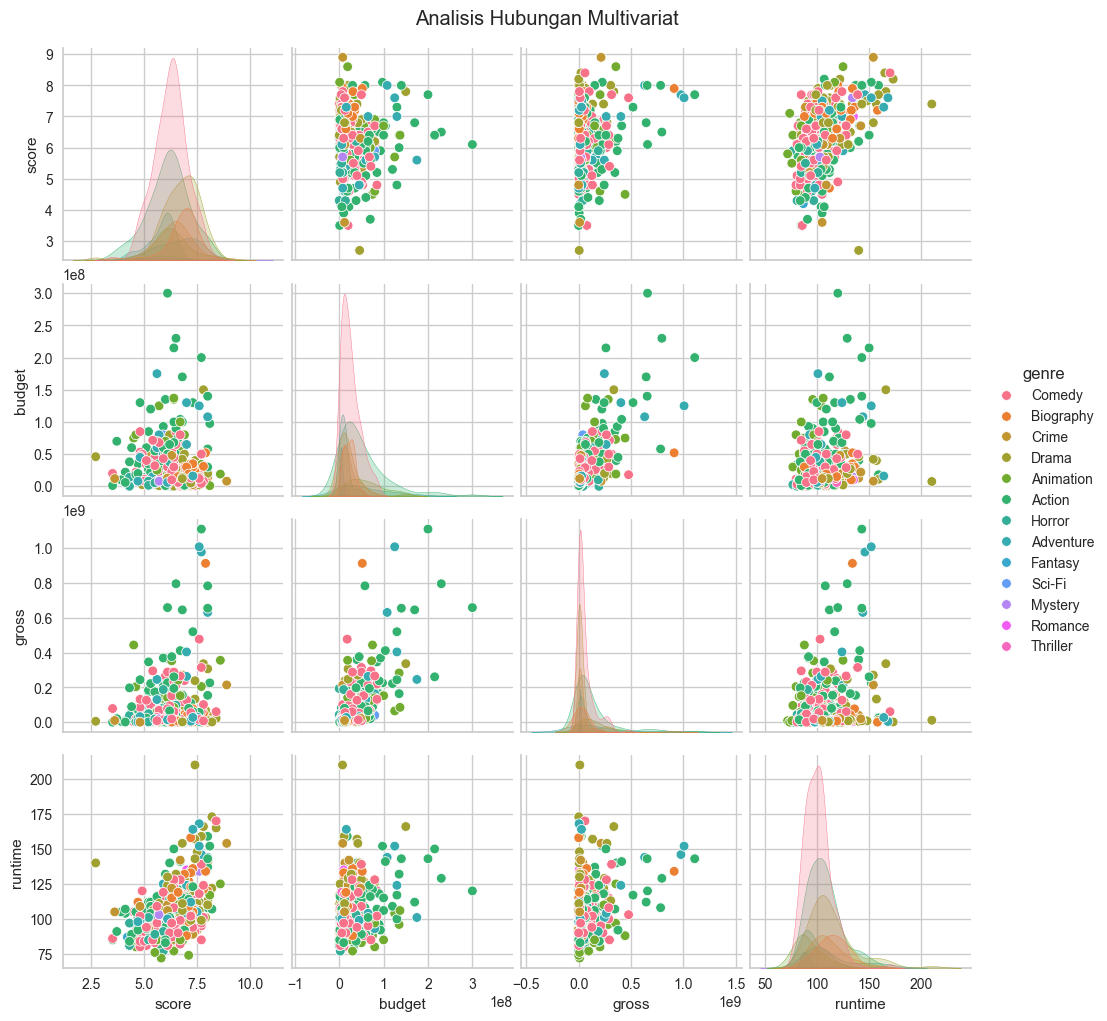

In [19]:
sns.pairplot(df[['score', 'budget', 'gross', 'runtime', 'genre']].sample(500), 
             hue='genre', diag_kind='kde')
plt.suptitle('Analisis Hubungan Multivariat', y=1.02)
plt.show()

# **5. Data Preprocessing**

In [20]:
print("Nilai yang Hilang:")
print(df.isnull().sum())

Nilai yang Hilang:
name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64


In [21]:
print("\nPersentase Nilai yang Hilang:")
print((df.isnull().sum() / len(df) * 100).round(2), '%')


Persentase Nilai yang Hilang:
name         0.00
rating       1.00
genre        0.00
year         0.00
released     0.03
score        0.04
votes        0.04
director     0.00
writer       0.04
star         0.01
country      0.04
budget      28.31
gross        2.46
company      0.22
runtime      0.05
dtype: float64 %


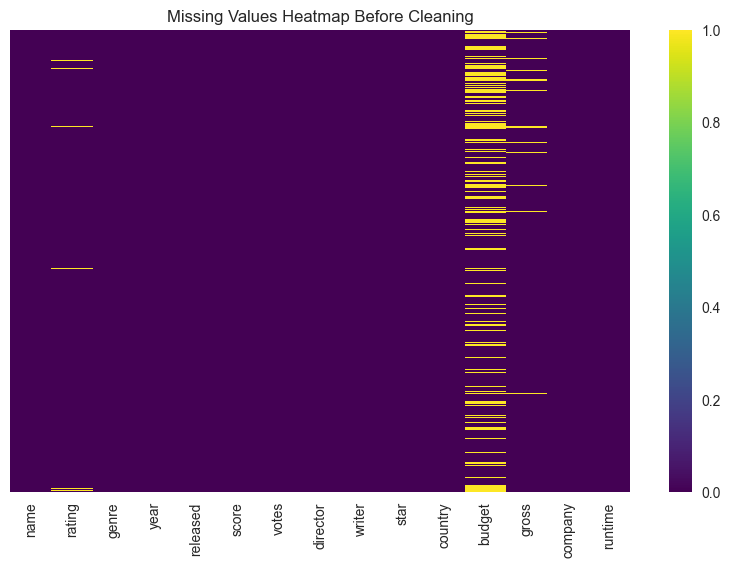

In [22]:
plt.figure(figsize=(10, 6))

sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.title('Missing Values Heatmap Before Cleaning')
plt.show()

In [23]:
df['budget'] = df['budget'].fillna(df['budget'].median())

moderate_cols = ['gross', 'company', 'rating', 'released']
num_cols = ['gross']
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = ['company', 'rating']
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

low_missing_cols = ['score', 'votes', 'writer', 'star', 'country', 'runtime']
df[low_missing_cols] = df[low_missing_cols].fillna(method='ffill')

/var/folders/7c/r339yn2d5535rzdsd58d38t40000gn/T/ipykernel_15350/4128474054.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[low_missing_cols] = df[low_missing_cols].fillna(method='ffill')


In [24]:
print("\nMissing values percentage after handling:")
print((df.isnull().sum() / len(df) * 100).round(2))

print("\nShape of dataset:", df.shape)


Missing values percentage after handling:
name        0.00
rating      0.00
genre       0.00
year        0.00
released    0.03
score       0.00
votes       0.00
director    0.00
writer      0.00
star        0.00
country     0.00
budget      0.00
gross       0.00
company     0.00
runtime     0.00
dtype: float64

Shape of dataset: (7668, 15)


In [25]:
print("\nBaris Duplikat:", df.duplicated().sum())
print("Persentase Duplikat: {:.2f}%".format((df.duplicated().sum() / len(df) * 100)))


Baris Duplikat: 0
Persentase Duplikat: 0.00%


In [26]:
selector = VarianceThreshold(threshold=0.1)
selector.fit(df.select_dtypes(include='number'))
low_var_features = df.select_dtypes(include='number').columns[~selector.get_support()]

print("Low variance features to consider dropping:", low_var_features)

Low variance features to consider dropping: Index([], dtype='object')


In [27]:
corr_matrix = df.select_dtypes(include='number').corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.9)]

print("Highly correlated features (>0.9):", high_corr_features)

Highly correlated features (>0.9): []


In [28]:
for col in df.select_dtypes(include='object'):
    unique_count = df[col].nunique()
    dominant_ratio = df[col].value_counts(normalize=True).iloc[0]
    print(f"{col}: {unique_count} unique values, Dominant category: {dominant_ratio:.2%}")

name: 7512 unique values, Dominant category: 0.04%
rating: 12 unique values, Dominant category: 49.22%
genre: 19 unique values, Dominant category: 29.28%
released: 3414 unique values, Dominant category: 0.12%
director: 2949 unique values, Dominant category: 0.50%
writer: 4535 unique values, Dominant category: 0.48%
star: 2814 unique values, Dominant category: 0.56%
country: 59 unique values, Dominant category: 71.41%
company: 2385 unique values, Dominant category: 5.14%


In [29]:
drop_cols = ['name', 'released', 'director', 'writer', 'star', 'year', 'company']
df.drop(drop_cols, axis=1, inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   rating   7668 non-null   object 
 1   genre    7668 non-null   object 
 2   score    7668 non-null   float64
 3   votes    7668 non-null   float64
 4   country  7668 non-null   object 
 5   budget   7668 non-null   float64
 6   gross    7668 non-null   float64
 7   runtime  7668 non-null   float64
dtypes: float64(5), object(3)
memory usage: 479.4+ KB


In [31]:
categorical_features = []
numerical_features = []

for col in df.columns:
    if df[col].dtype == 'object':
        categorical_features.append(col)
    else:
        numerical_features.append(col)

print('Kolom kategorikal:', categorical_features)
print('Jumlah kolom kategorikal:', len(categorical_features))
print('Kolom numerikal:', numerical_features)
print('Jumlah kolom numerikal:', len(numerical_features))

Kolom kategorikal: ['rating', 'genre', 'country']
Jumlah kolom kategorikal: 3
Kolom numerikal: ['score', 'votes', 'budget', 'gross', 'runtime']
Jumlah kolom numerikal: 5



Analisis Outlier untuk score:
Batas bawah: 3.85
Batas atas: 9.049999999999999
Jumlah outlier: 119


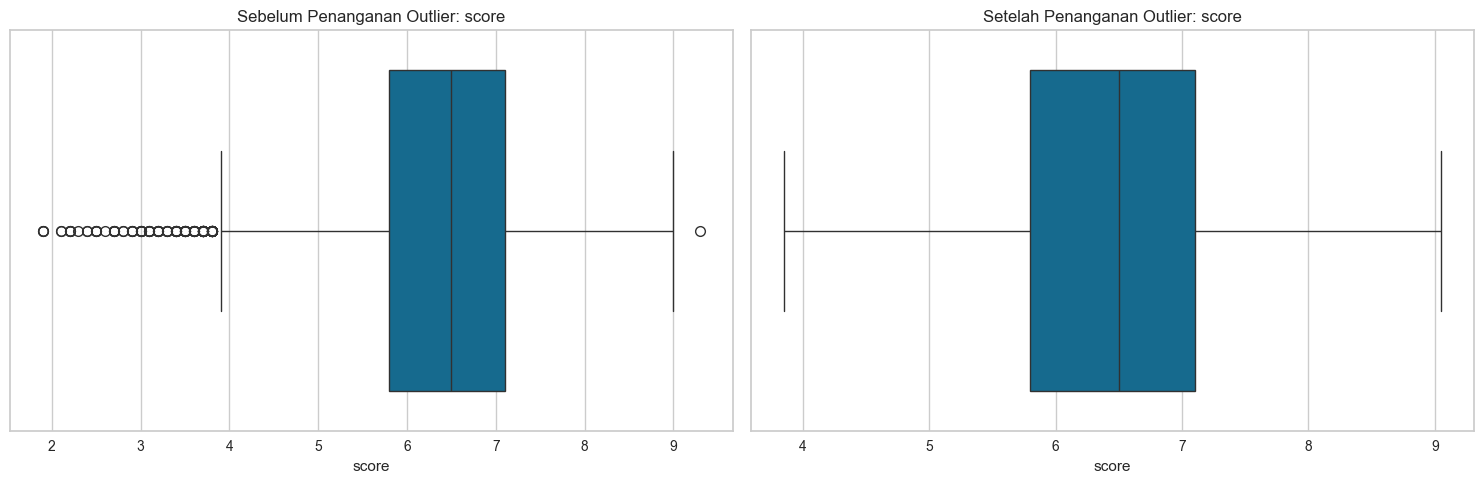


Analisis Outlier untuk votes:
Batas bawah: -116750.0
Batas atas: 218850.0
Jumlah outlier: 803


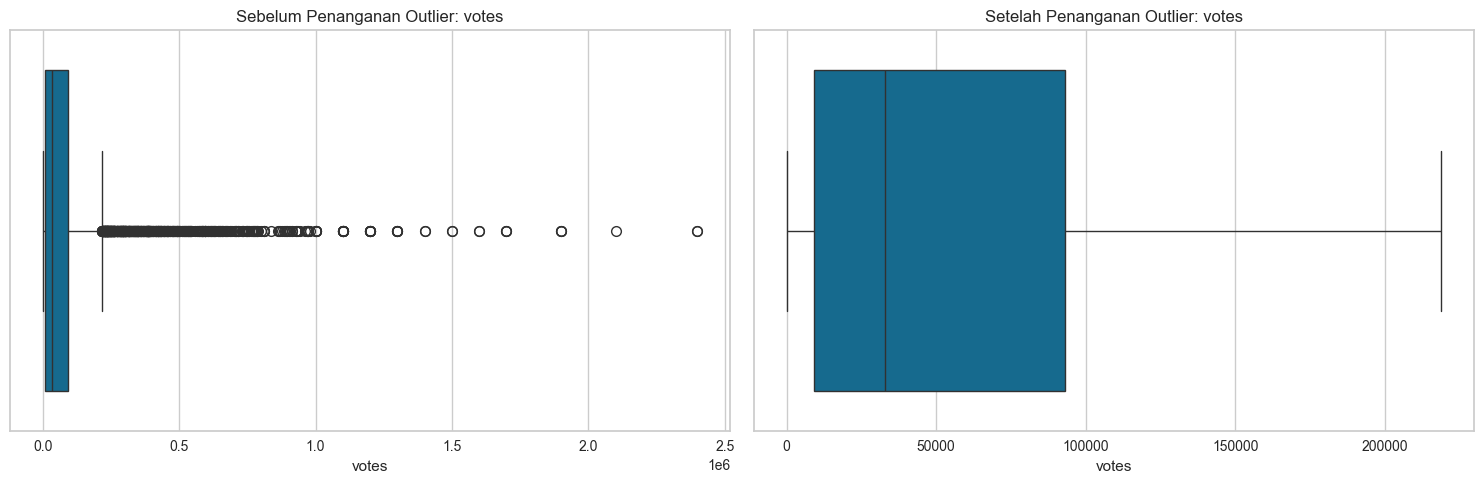


Analisis Outlier untuk budget:
Batas bawah: -13000000.0
Batas atas: 59000000.0
Jumlah outlier: 1008


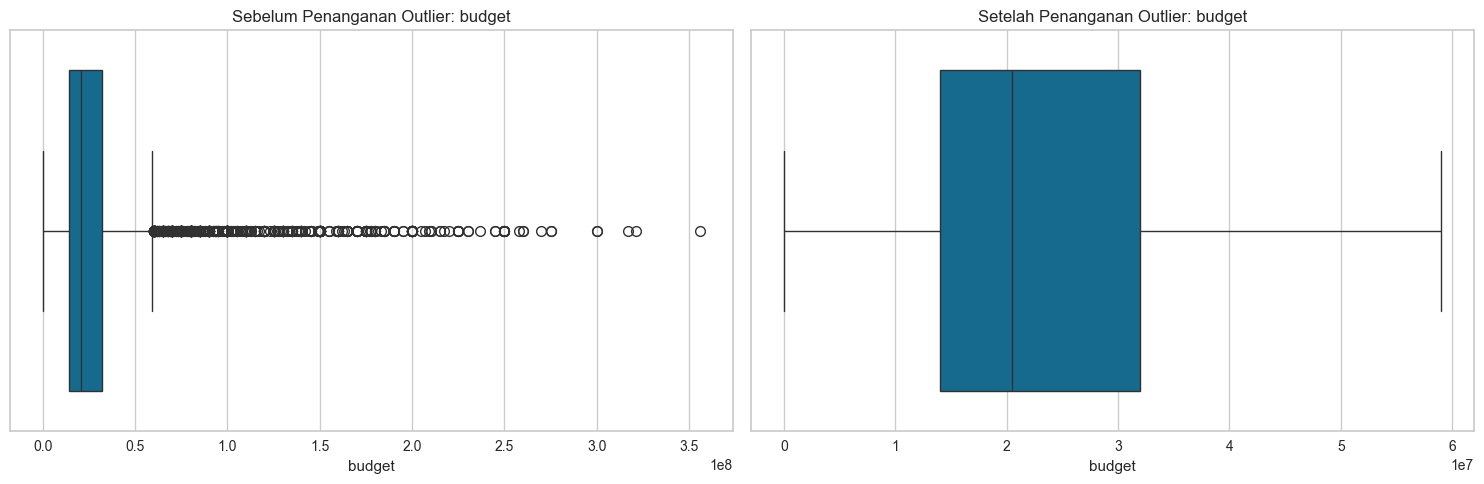


Analisis Outlier untuk gross:
Batas bawah: -97227450.875
Batas atas: 174528820.125
Jumlah outlier: 911


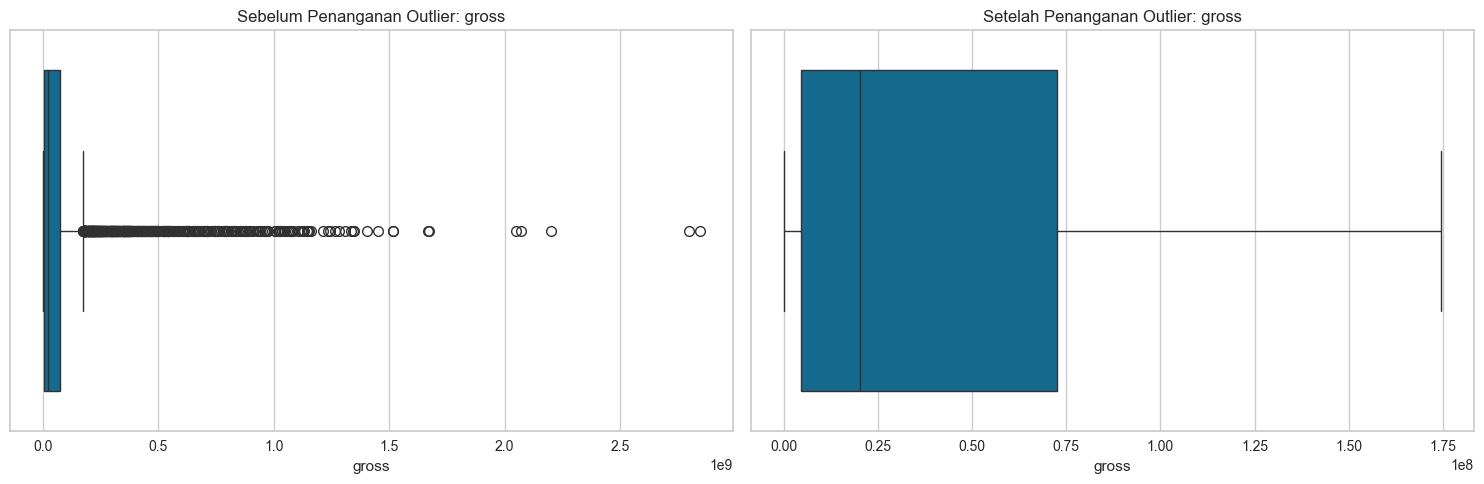


Analisis Outlier untuk runtime:
Batas bawah: 63.5
Batas atas: 147.5
Jumlah outlier: 240


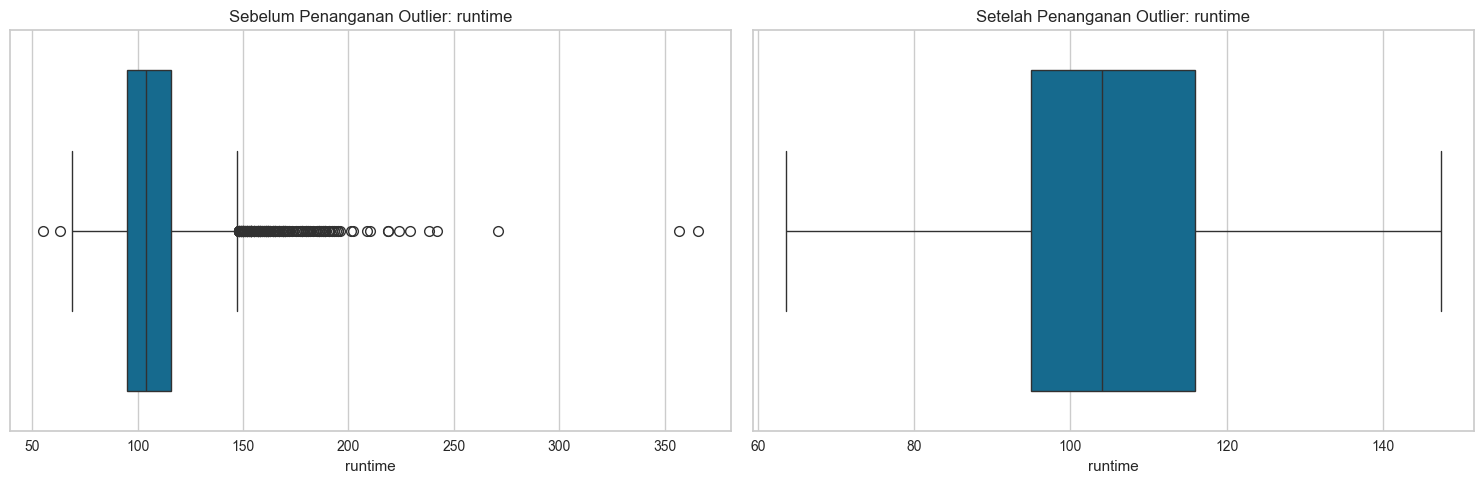

In [32]:
for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    print(f"\nAnalisis Outlier untuk {feature}:")
    print(f"Batas bawah: {lower_bound}")
    print(f"Batas atas: {upper_bound}")
    print(f"Jumlah outlier: {len(df[(df[feature] < lower_bound) | (df[feature] > upper_bound)])}")
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[feature])
    plt.title(f'Sebelum Penanganan Outlier: {feature}')
    
    df[f'{feature}'] = df[feature].clip(lower_bound, upper_bound)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[f'{feature}'])
    plt.title(f'Setelah Penanganan Outlier: {feature}')
    
    plt.tight_layout()
    plt.show()

In [33]:
df.head()

,rating,genre,score,votes,country,budget,gross,runtime
0,R,Drama,8.4,218850.0,United Kingdom,19000000.0,4.699877e+07,146.0
1,R,Adventure,5.8,65000.0,United States,4500000.0,5.885311e+07,104.0
2,PG,Action,8.7,218850.0,United States,18000000.0,1.745288e+08,124.0
3,PG,Comedy,7.7,218850.0,United States,3500000.0,8.345354e+07,88.0
4,R,Comedy,7.3,108000.0,United States,6000000.0,3.984634e+07,98.0


In [34]:
df_scaled = df.copy()
robust_scaler = RobustScaler()
df_scaled[['score', 'votes', 'budget', 'gross', 'runtime']] = robust_scaler.fit_transform(df_scaled[['score', 'votes', 'budget', 'gross', 'runtime']])

In [35]:
df_scaled.head()

,rating,genre,score,votes,country,budget,gross,runtime
0,R,Drama,1.461538,2.215137,United Kingdom,-0.083333,0.394368,2.000000
1,R,Adventure,-0.538462,0.381406,United States,-0.888889,0.568853,0.000000
2,PG,Action,1.692308,2.215137,United States,-0.138889,2.271492,0.952381
3,PG,Comedy,0.923077,2.215137,United States,-0.944444,0.930949,-0.761905
4,R,Comedy,0.615385,0.893921,United States,-0.805556,0.289091,-0.285714


In [36]:
categorical_features = []

for col in df.columns:
    if df[col].dtype == 'object':
        categorical_features.append(col)

print('Kolom kategorikal:', categorical_features)
print('Jumlah kolom kategorikal:', len(categorical_features))

Kolom kategorikal: ['rating', 'genre', 'country']
Jumlah kolom kategorikal: 3


In [37]:
print("Data Sebelum Dilakukan Encoding:")
df[categorical_features].head()

Data Sebelum Dilakukan Encoding:


,rating,genre,country
0,R,Drama,United Kingdom
1,R,Adventure,United States
2,PG,Action,United States
3,PG,Comedy,United States
4,R,Comedy,United States


In [38]:
label_encoders = {}
df_lencoder = df_scaled.copy()

for col in categorical_features:
    label_encoders[col] = LabelEncoder()
    df_lencoder[col] = label_encoders[col].fit_transform(df[col])

df_lencoder.head()

,rating,genre,score,votes,country,budget,gross,runtime
0,6,6,1.461538,2.215137,54,-0.083333,0.394368,2.000000
1,6,1,-0.538462,0.381406,55,-0.888889,0.568853,0.000000
2,4,0,1.692308,2.215137,55,-0.138889,2.271492,0.952381
3,4,4,0.923077,2.215137,55,-0.944444,0.930949,-0.761905
4,6,4,0.615385,0.893921,55,-0.805556,0.289091,-0.285714


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

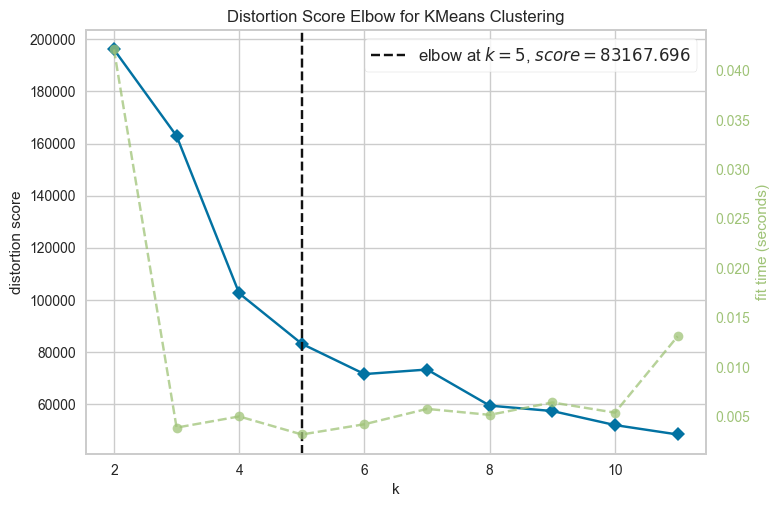

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [39]:
df_clustering = df_lencoder.copy()

kmeans = KMeans()

visualizer = KElbowVisualizer(kmeans, k=(2, 12))

visualizer.fit(df_clustering)

visualizer.show()

In [40]:
optimal_k = visualizer.elbow_value_

kmeans = KMeans(n_clusters=optimal_k, random_state=42, init='k-means++')
kmeans.fit(df_clustering)

KMeans(n_clusters=np.int64(5), random_state=42)

## **b. Evaluasi Model Clustering**

In [41]:
silhouette_score_before = silhouette_score(df_clustering, kmeans.labels_)

print(f"Silhouette Score: {silhouette_score_before}")

Silhouette Score: 0.395061608201743


## **c. Feature Selection (Opsional)**

In [42]:
features = df_clustering.select_dtypes(include=['float64', 'int64']).columns.tolist()
X = df_clustering[features]

pca = PCA()
pca.fit(X)

feature_importance = np.abs(pca.components_)
feature_importance_normalized = feature_importance / feature_importance.sum(axis=1)[:, np.newaxis]

important_features_indices = np.argsort(np.sum(feature_importance_normalized, axis=0))[::-1]
sorted_features = [features[i] for i in important_features_indices]

print("\nFeature importance ranking:")
for i, feature in enumerate(sorted_features):
    print(f"{i+1}. {feature}")

best_score = 0
best_config = {}

for n_features in range(5, 9):
    selected_features = sorted_features[:n_features]
    X = df_clustering[selected_features]
    
    for n_clusters in range(2, 6):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, init='k-means++')
        labels = kmeans.fit_predict(X)
        sil_score = silhouette_score(X, labels)
        print(f"Features: {n_features}, Method: KMeans, Clusters: {n_clusters}, Silhouette: {sil_score:.4f}")
        
        if sil_score > best_score:
            best_score = sil_score
            best_config = {
                'method': 'KMeans',
                'n_features': n_features,
                'features': selected_features,
                'n_clusters': n_clusters,
                'score': sil_score,
                'model': kmeans
            }
    
    # Agglomerative Clustering
    for n_clusters in range(2, 6):
        agg = AgglomerativeClustering(n_clusters=n_clusters)
        labels = agg.fit_predict(X)
        sil_score = silhouette_score(X, labels)
        print(f"Features: {n_features}, Method: Agglomerative, Clusters: {n_clusters}, Silhouette: {sil_score:.4f}")
        
        if sil_score > best_score:
            best_score = sil_score
            best_config = {
                'method': 'Agglomerative',
                'n_features': n_features,
                'features': selected_features,
                'n_clusters': n_clusters,
                'score': sil_score,
                'model': agg
            }

print("\nBest configuration found:")
for key, value in best_config.items():
    if key != 'model': 
        print(f"{key}: {value}")
        
print("Best method:", best_config['method'])
best_features = best_config['features']
best_n_clusters = best_config['n_clusters']
best_labels = best_config['model'].fit_predict(df_clustering[best_features])


Feature importance ranking:
1. votes
2. budget
3. gross
4. runtime
5. score
6. country
7. rating
8. genre
Features: 5, Method: KMeans, Clusters: 2, Silhouette: 0.4523
Features: 5, Method: KMeans, Clusters: 3, Silhouette: 0.2592
Features: 5, Method: KMeans, Clusters: 4, Silhouette: 0.2443
Features: 5, Method: KMeans, Clusters: 5, Silhouette: 0.2539
Features: 5, Method: Agglomerative, Clusters: 2, Silhouette: 0.3991
Features: 5, Method: Agglomerative, Clusters: 3, Silhouette: 0.1925
Features: 5, Method: Agglomerative, Clusters: 4, Silhouette: 0.1906
Features: 5, Method: Agglomerative, Clusters: 5, Silhouette: 0.2058
Features: 6, Method: KMeans, Clusters: 2, Silhouette: 0.8955
Features: 6, Method: KMeans, Clusters: 3, Silhouette: 0.8512
Features: 6, Method: KMeans, Clusters: 4, Silhouette: 0.8500
Features: 6, Method: KMeans, Clusters: 5, Silhouette: 0.4395
Features: 6, Method: Agglomerative, Clusters: 2, Silhouette: 0.8929
Features: 6, Method: Agglomerative, Clusters: 3, Silhouette: 0.84

In [43]:
X_best = df_clustering[best_features]
best_kmeans = KMeans(n_clusters=best_n_clusters, random_state=42, init='k-means++')
best_labels = best_kmeans.fit_predict(X_best)
silhouette_score_after = silhouette_score(X_best, best_labels)

In [44]:
print(f"Silhouette Score before Feature Selection: {silhouette_score_before:.4f}")
print(f"Silhouette Score after Feature Selection: {silhouette_score_after:.4f}")

Silhouette Score before Feature Selection: 0.3951
Silhouette Score after Feature Selection: 0.8955


## **d. Visualisasi Hasil Clustering**

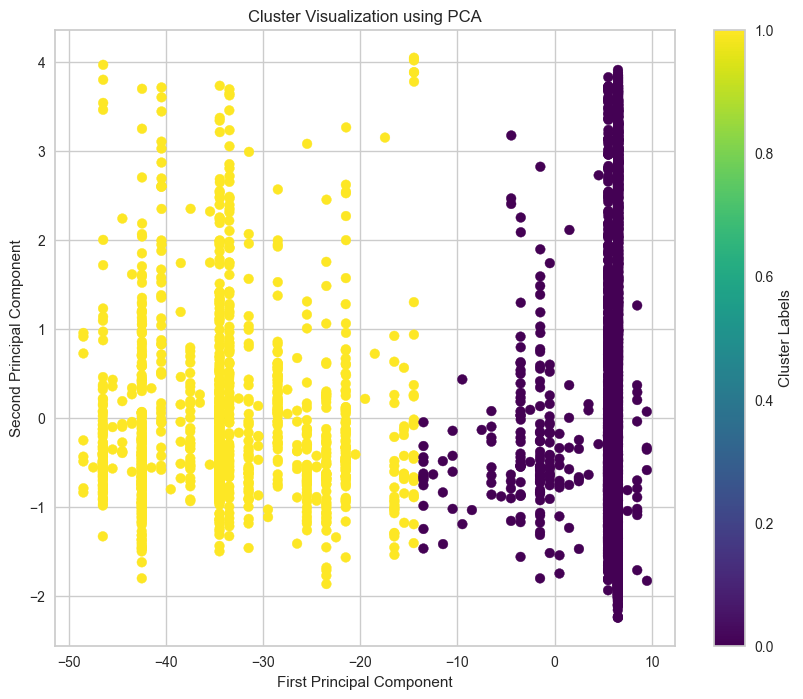

In [ ]:
df_clustering['Cluster'] = best_labels 

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_best)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=best_labels, cmap='viridis')
plt.title('Cluster Visualization using PCA')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(scatter, label='Cluster Labels')
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

##### Tidak melakukan standarisasi untuk data numerikal

In [46]:
df_normalized = df_clustering[best_features].copy()
df_normalized['Cluster'] = best_labels

In [47]:
print("Data Before Inverse Transform:")
df_normalized.head()

Data Before Inverse Transform:


,votes,budget,gross,runtime,score,country,Cluster
0,2.215137,-0.083333,0.394368,2.000000,1.461538,54,0
1,0.381406,-0.888889,0.568853,0.000000,-0.538462,55,0
2,2.215137,-0.138889,2.271492,0.952381,1.692308,55,0
3,2.215137,-0.944444,0.930949,-0.761905,0.923077,55,0
4,0.893921,-0.805556,0.289091,-0.285714,0.615385,55,0


In [48]:
numeric_features = ['score', 'votes', 'budget', 'gross', 'runtime']

df_normalized[numeric_features] = robust_scaler.inverse_transform(
    df_normalized[numeric_features]
)

df_normalized['country'] = label_encoders['country'].inverse_transform(df_normalized['country'])

print("\nData After Inverse Transform:")
df_normalized.head()


Data After Inverse Transform:


,votes,budget,gross,runtime,score,country,Cluster
0,218850.0,19000000.0,4.699877e+07,146.0,8.4,United Kingdom,0
1,65000.0,4500000.0,5.885311e+07,104.0,5.8,United States,0
2,218850.0,18000000.0,1.745288e+08,124.0,8.7,United States,0
3,218850.0,3500000.0,8.345354e+07,88.0,7.7,United States,0
4,108000.0,6000000.0,3.984634e+07,98.0,7.3,United States,0


In [49]:
cluster_count = df_normalized['Cluster'].value_counts()
print(cluster_count,'\n')

Cluster
0    6490
1    1178
Name: count, dtype: int64 



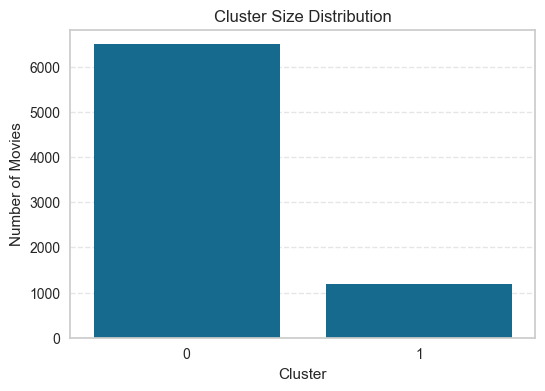

In [50]:
plt.figure(figsize=(6, 4))
cluster_counts = df_normalized['Cluster'].value_counts()
sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
plt.title('Cluster Size Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Movies')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

In [51]:
def analyze_character_cluster(df, cluster_labels, k):
    df = df_normalized.copy()
    df["Cluster"] = cluster_labels

    print("Analysis of Cluster Characteristics:")
    for cluster_id in range(k):
        cluster_data = df[df["Cluster"] == cluster_id]
        
        stats = cluster_data.agg({
            "score": ["mean", "min", "max"],
            "votes": ["mean", "min", "max"],
            "budget": ["mean", "min", "max"],
            "gross": ["mean", "min", "max"],
            "runtime": ["mean", "min", "max"]
        }).round(2)
        
        mode_country = cluster_data["country"].mode().values[0] if not cluster_data["country"].isna().all() else "N/A"

        print(f"\nCluster {cluster_id}:")
        for col in ["score", "votes", "budget", "gross", "runtime"]:
            print(f"{col.capitalize()} - Avg: {stats[col]['mean']}, Min: {stats[col]['min']}, Max: {stats[col]['max']}")
        
        print(f"Most Common Country: {mode_country}")

# Example usage:
analyze_character_cluster(df_normalized, kmeans.labels_, 2)


Analysis of Cluster Characteristics:

Cluster 0:
Score - Avg: 6.31, Min: 3.85, Max: 9.0
Votes - Avg: 96451.14, Min: 14.0, Max: 218850.0
Budget - Avg: 35988489.69, Min: 10000.0, Max: 59000000.0
Gross - Avg: 83178712.86, Min: 2970.0, Max: 174528820.12
Runtime - Avg: 107.65, Min: 63.5, Max: 147.5
Most Common Country: United States

Cluster 1:
Score - Avg: 6.45, Min: 3.85, Max: 8.6
Votes - Avg: 47271.41, Min: 79.0, Max: 218850.0
Budget - Avg: 21747600.46, Min: 25000.0, Max: 59000000.0
Gross - Avg: 34825408.34, Min: 2037.0, Max: 174528820.12
Runtime - Avg: 104.5, Min: 63.5, Max: 147.5
Most Common Country: Canada


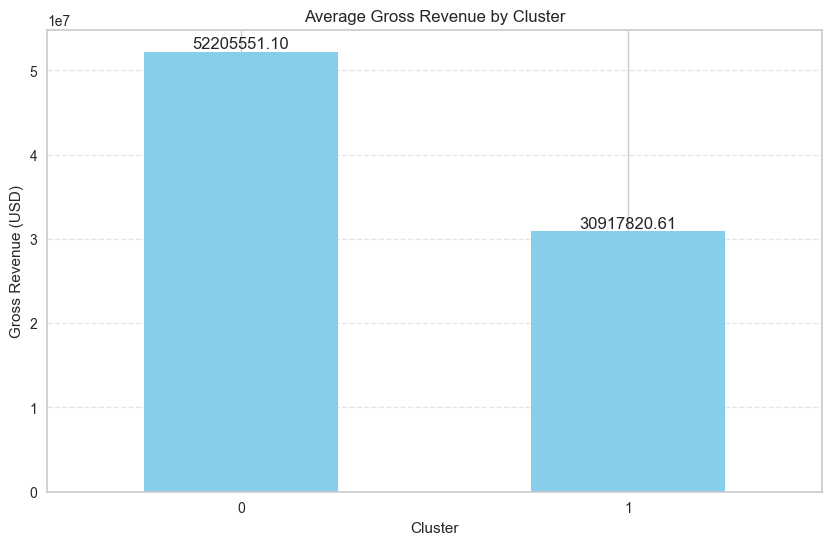

In [52]:
cluster_means = df_normalized.groupby('Cluster')['gross'].mean()
ax = cluster_means.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Average Gross Revenue by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Gross Revenue (USD)')
plt.xticks(rotation=0)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

plt.show()

/var/folders/7c/r339yn2d5535rzdsd58d38t40000gn/T/ipykernel_15350/3970753058.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=df_normalized, x='Cluster', y='budget', ci=95, palette='deep')
/var/folders/7c/r339yn2d5535rzdsd58d38t40000gn/T/ipykernel_15350/3970753058.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_normalized, x='Cluster', y='budget', ci=95, palette='deep')


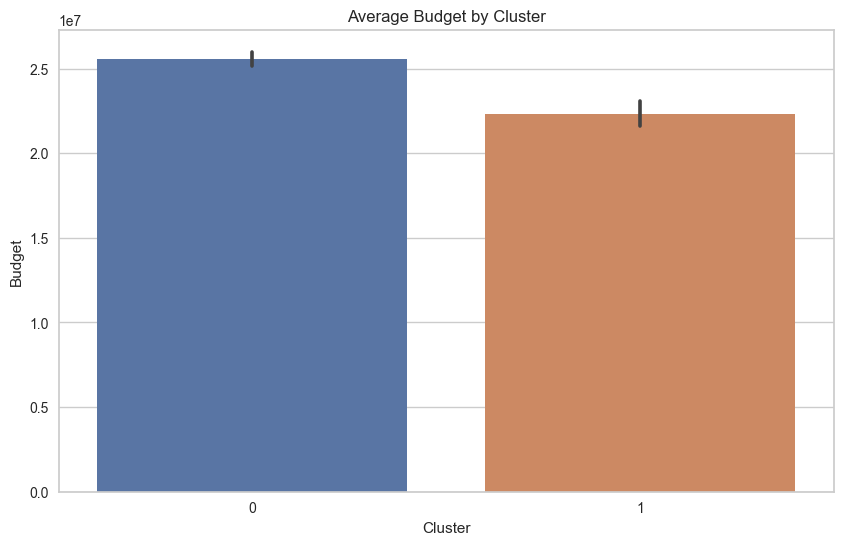

In [53]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_normalized, x='Cluster', y='budget', ci=95, palette='deep')
plt.title('Average Budget by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Budget')
plt.show()

## Analisis Karakteristik Cluster

### Cluster 0:
- **Keuangan**: 
  - Rata-rata Pendapatan Kotor: $83.17 juta
  - Rata-rata Anggaran Produksi: $35.98 juta
- **Penonton**:
  - Rata-rata Jumlah Vote: 96,451
  - Rata-rata Skor: 6.31
- **Durasi**:
  - Rata-rata Runtime: 107.65 menit
- **Geografis**:
  - Negara Paling Umum: Amerika Serikat

**Insight Utama**:
1. Cluster ini merepresentasikan film-film blockbuster dengan anggaran besar (rata-rata $35.98 juta) dan pendapatan tinggi
2. Memiliki jangkauan penonton yang sangat luas dengan jumlah vote tertinggi mencapai 218,850
3. Meski memiliki skor rata-rata 6.31, beberapa film mencapai skor maksimal 9.0
4. Dominasi produksi film dari Amerika Serikat dengan karakteristik blockbuster Hollywood

### Cluster 1:
- **Keuangan**:
  - Rata-rata Pendapatan Kotor: $34.82 juta
  - Rata-rata Anggaran Produksi: $21.74 juta
- **Penonton**:
  - Rata-rata Jumlah Vote: 47,271
  - Rata-rata Skor: 6.45
- **Durasi**:
  - Rata-rata Runtime: 104.50 menit
- **Geografis**:
  - Negara Paling Umum: Kanada

**Insight Utama**:
1. Mewakili film-film medium budget dengan rata-rata anggaran $21.74 juta
2. Memiliki rating rata-rata lebih tinggi (6.45) meski dengan jangkauan penonton lebih terbatas
3. Budget produksi lebih efisien dengan minimum $25,000 namun tetap bisa menghasilkan pendapatan
4. Karakteristik film non-Hollywood dengan dominasi produksi dari Kanada

# **7. Mengeksport Data**

In [54]:
df_normalized.to_csv('movies_clustering.csv', index=False)